In [197]:
import numpy
import matplotlib.pyplot as plt
from sklearn.svm import learnSVC
from sklearn.datasets import make_classification

In [225]:
def matrix_factorization(A,X, Y, K, steps=5000, alpha=0.0002, beta=0.002):
    Y = Y.T
    stept=[]
    eijt=[]
    for step in range(steps):
        for i in range(len(A)):
            for j in range(len(A[i])):
                if A[i][j] > 0:
                    eij = A[i][j] - numpy.dot(X[i,:],Y[:,j])
                    for k in range(K):
                        X[i][k] = X[i][k] + alpha * (2 * eij * Y[k][j] - beta * X[i][k])
                        Y[k][j] = Y[k][j] + alpha * (2 * eij * X[i][k] - beta * Y[k][j])
        eA = numpy.dot(X,Y)
        e = 0
        for i in range(len(A)):
            for j in range(len(A[i])):
                if A[i][j] > 0:
                    e = e + pow(A[i][j] - numpy.dot(X[i,:],Y[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(X[i][k],2) + pow(Y[k][j],2) )
        if e < 0.001:
            break
        stept.append(step)
        eijt.append(eij)
    return X, Y.T,stept,eijt


In [226]:
if __name__ == "__main__":
    A = [
         [5,3,0,1],
         [4,0,0,1],
         [1,1,0,5],
         [1,0,0,4],
         [0,1,5,4],
        ]

    A = numpy.array(A)
    N = len(A)
    M = len(A[0])
    K = 2
    step_ar=[]
    eij_ar=[]

    X = numpy.random.rand(N,K)
    Y = numpy.random.rand(M,K)
    nX, nY,step_ar,eij_ar = matrix_factorization(A, X, Y, K)
    nA=numpy.dot(nX,nY.T)
    

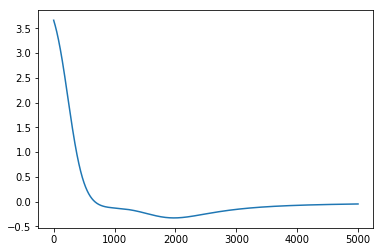

In [227]:
plt.plot(step_ar,eij_ar)
plt.show()

In [151]:
print(nY)

[[1.07584702e-03 2.21924634e+00]
 [1.15386773e-01 1.30627761e+00]
 [2.25177161e+00 1.49403586e+00]
 [2.26758177e+00 2.43847093e-01]]


In [193]:
print(nA)

[[4.99770406 2.99829223 4.90275379 1.00023598]
 [3.99818579 2.41526037 4.12765078 1.00010295]
 [1.00043643 0.99883263 5.91069837 4.99713737]
 [0.99984305 0.9154851  4.88390004 3.99835779]
 [1.14678668 1.00125492 4.99854031 3.99904778]]
